# **Análisis del Comportamiento de las Acciones en la Industria de Microprocesadores**

El panorama actual de inversión bursátil ofrece diversas vías para los interesados, sin embargo, la **toma de decisiones informada es crucial**. Antes de asignar capital a cualquier acción, es imperativo realizar un **estudio exhaustivo y detallado de su comportamiento histórico**. Ya sea a través del **análisis técnico**, que se enfoca en patrones de precios y volumen, o el **análisis fundamental**, que evalúa la salud financiera y las perspectivas de crecimiento de una empresa, la comprensión profunda del pasado es un pilar para mitigar el riesgo. Se recomienda analizar el comportamiento de las acciones por un período mínimo de dos años para discernir tendencias, identificar volatilidades y anticipar posibles riesgos asociados a la inversión.

Este estudio se centra precisamente en esta premisa, investigando el **comportamiento bursátil de tres líderes destacados en la industria de microprocesadores de alto rendimiento**. Este sector, vital para la tecnología moderna, ha experimentado un crecimiento exponencial y una dinámica competitiva intensa. Las compañías seleccionadas para este análisis son:

- **NVIDIA (NVDA):** Reconocida por su liderazgo en unidades de procesamiento gráfico (GPU) y su creciente influencia en la inteligencia artificial y el aprendizaje automático.
- **AMD (AMD):** Un competidor clave en la fabricación de CPUs y GPUs, con una fuerte presencia en el mercado de centros de datos y computadoras personales.
- **INTEL (INTC):** Un gigante histórico en la producción de microprocesadores, actualmente en una fase de reestructuración y buscando recuperar su cuota de mercado frente a sus competidores.

## Objetivo del Proyecto

El objetivo de este proyecto es **examinar los datos históricos de NVIDIA, AMD e INTEL para identificar patrones de rendimiento, factores de fluctuación de precios y comparativas de riesgo-recompensa**. Esto busca ofrecer una **visión clara y fundamentada**, enfatizando en el análisis histórico como **herramienta clave para una inversión estratégica y consciente** en el volátil mercado de valores, y así profundizar la comprensión de la dinámica de inversión en el sector tecnológico.

### Se busca resolver los siguientes puntos:

1. Identificar el rendimiento en los últimos dos años para las acciones a estudiar.
2. Analizar la fluctuacion de precios en el periodo de tiempo a estudiar.
3. Realizar una comparación de riesgo versus recompensa.




In [ ]:
import pandas as pd
import numpy as np
df_NVDA = pd.read_csv('NVDA_historical_data.csv')
df_AMD = pd.read_csv('AMD_historical_data.csv')
df_INTC = pd.read_csv('INTC_historical_data.csv')

#trasnformacion de fecha a formato datetime
df_NVDA['Date'] = pd.to_datetime(df_NVDA['Date'])
df_AMD['Date'] = pd.to_datetime(df_AMD['Date'])
df_INTC['Date'] = pd.to_datetime(df_INTC['Date'])

/tmp/ipython-input-8-2774644328.py:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_NVDA['Date'] = pd.to_datetime(df_NVDA['Date'])
/tmp/ipython-input-8-2774644328.py:9: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_AMD['Date'] = pd.to_datetime(df_AMD['Date'])
/tmp/ipython-input-8-2774644328.py:10: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `ut

# SE PREPARAN LOS DATOS PARA PROCESARLOS

In [ ]:
#se hace filtran los datos desde el 2023 hasta la fechas para las 3 acciones
fecha_corte_str='2023-01-03 00:00:00-05:00'
fecha_corte = pd.to_datetime(fecha_corte_str)

df_fl_AMD = df_AMD[df_AMD['Date'] >= fecha_corte]
df_fl_NVDA = df_NVDA[df_NVDA['Date'] >= fecha_corte]
df_fl_INTC = df_INTC[df_INTC['Date'] >= fecha_corte]


In [ ]:
# SE IMPRIMEN LOS DATOS

print("--- df.info()-AMD ---")
df_fl_AMD.info()

print("--- df.info()-NVDA ---")
df_fl_NVDA.info()

print("--- df.info()-INTC ---")
df_fl_INTC.info()


--- df.info()-AMD ---
<class 'pandas.core.frame.DataFrame'>
Index: 624 entries, 10791 to 11414
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          624 non-null    object 
 1   Open          624 non-null    float64
 2   High          624 non-null    float64
 3   Low           624 non-null    float64
 4   Close         624 non-null    float64
 5   Volume        624 non-null    int64  
 6   Dividends     624 non-null    float64
 7   Stock Splits  624 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 43.9+ KB
--- df.info()-NVDA ---
<class 'pandas.core.frame.DataFrame'>
Index: 624 entries, 6026 to 6649
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          624 non-null    object 
 1   Open          624 non-null    float64
 2   High          624 non-null    float64
 3   Low           624 non-null    floa

In [ ]:
#Se genera una descripcion de los dataset
print("\n--- df.describe()-AMD ---")
df_fl_AMD.describe()


--- df.describe()-AMD ---


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,624.000000,624.000000,624.000000,624.000000,6.240000e+02,624.0,624.0
mean,126.507901,128.843990,124.070513,126.458654,5.453411e+07,0.0,0.0
std,31.217731,31.597433,30.433171,30.961911,2.277546e+07,0.0,0.0
min,63.150002,64.300003,60.049999,62.330002,1.608570e+07,0.0,0.0
25%,102.340000,104.512503,101.192499,102.809999,3.894530e+07,0.0,0.0
50%,119.939999,122.115002,117.820000,119.665001,4.986420e+07,0.0,0.0
75%,153.002499,154.615002,150.429996,152.127502,6.534358e+07,0.0,0.0
max,213.410004,227.300003,208.220001,211.380005,1.733720e+08,0.0,0.0


In [ ]:
#Se genera una descripcion de los dataset
print("\n--- df.describe()-NVDA ---")
df_fl_NVDA.describe()



--- df.describe()-NVDA ---


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,624.000000,624.000000,624.000000,624.000000,6.240000e+02,624.000000,624.000000
mean,82.847108,84.356845,81.187813,82.861679,3.936841e+08,0.000112,0.016026
std,43.271895,43.988949,42.336187,43.177705,1.711123e+08,0.000958,0.400320
min,14.461145,14.551066,14.021536,14.252332,1.044750e+08,0.000000,0.000000
25%,43.759475,44.098345,42.841035,43.604006,2.648360e+08,0.000000,0.000000
50%,87.430560,89.020061,85.962285,87.596638,3.795205e+08,0.000000,0.000000
75%,123.445774,125.745294,120.419341,123.763401,4.771828e+08,0.000000,0.000000
max,158.404999,158.710007,155.960007,157.915405,1.543911e+09,0.010000,10.000000


In [ ]:
#Se genera una descripcion de los dataset
print("\n--- df.describe()-INTC ---")
df_fl_INTC.describe()


--- df.describe()-INTC ---


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,624.000000,624.000000,624.000000,624.000000,6.240000e+02,624.000000,624.0
mean,29.896398,30.392251,29.416622,29.899774,6.034015e+07,0.001787,0.0
std,8.058999,8.110022,8.002957,8.067234,3.838426e+07,0.019003,0.0
min,18.070000,18.990000,17.670000,18.129999,1.303710e+07,0.000000,0.0
25%,22.505001,22.820000,22.045000,22.462500,3.596408e+07,0.000000,0.0
50%,29.836321,30.330560,29.515070,29.825798,4.975450e+07,0.000000,0.0
75%,34.775316,35.265228,34.106252,34.650192,7.007400e+07,0.000000,0.0
max,50.138508,50.602289,49.526694,50.089161,3.008959e+08,0.365000,0.0


# GRAFICOS CON MATPLOTLIB
Se realizara un grafico para el comportamiento de cada acción contemplando los siguientes datos:
1. Precio de Apertura
2. Precio Máximo
3. Precio Mínimo
4. Precio de Cierre

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Para formatear fechas en el eje X

df_date_AMD = df_fl_AMD.set_index('Date')
df_date_NVDA = df_fl_NVDA.set_index('Date')
df_date_INTC = df_fl_INTC.set_index('Date')


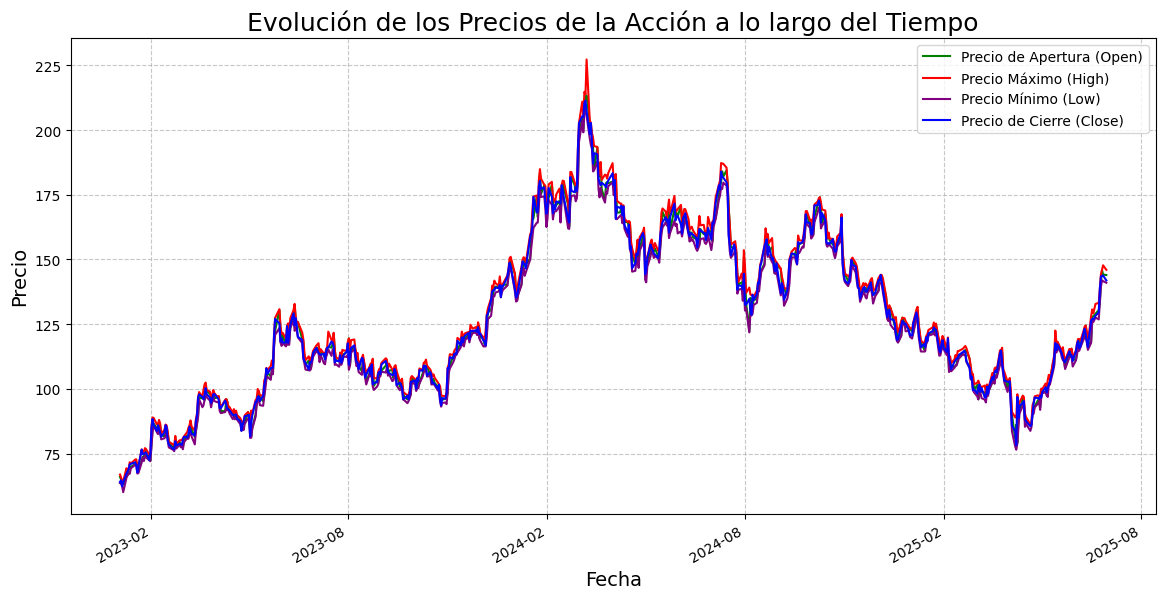

In [ ]:
# Grafico de datos importantes para AMD

# Crear la figura y los ejes para el gráfico
plt.figure(figsize=(14, 7)) # Define el tamaño del gráfico (ancho, alto) en pulgadas

# Graficamos todas las columnas de interés
plt.plot(df_date_AMD.index, df_date_AMD['Open'], color='green', label='Precio de Apertura (Open)')
plt.plot(df_date_AMD.index, df_date_AMD['High'], color='red', label='Precio Máximo (High)')
plt.plot(df_date_AMD.index, df_date_AMD['Low'], color='purple', label='Precio Mínimo (Low)')
plt.plot(df_date_AMD.index, df_date_AMD['Close'], color='blue', label='Precio de Cierre (Close)')

plt.title('Evolución de los Precios de la Acción AMD a lo largo del Tiempo', fontsize=18)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.legend(fontsize=10) # Mostrar leyenda para cada línea

# Mejorar el formato de las fechas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Solo Año-Mes
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6)) # Mostrar etiquetas cada 6 meses
plt.gcf().autofmt_xdate()

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


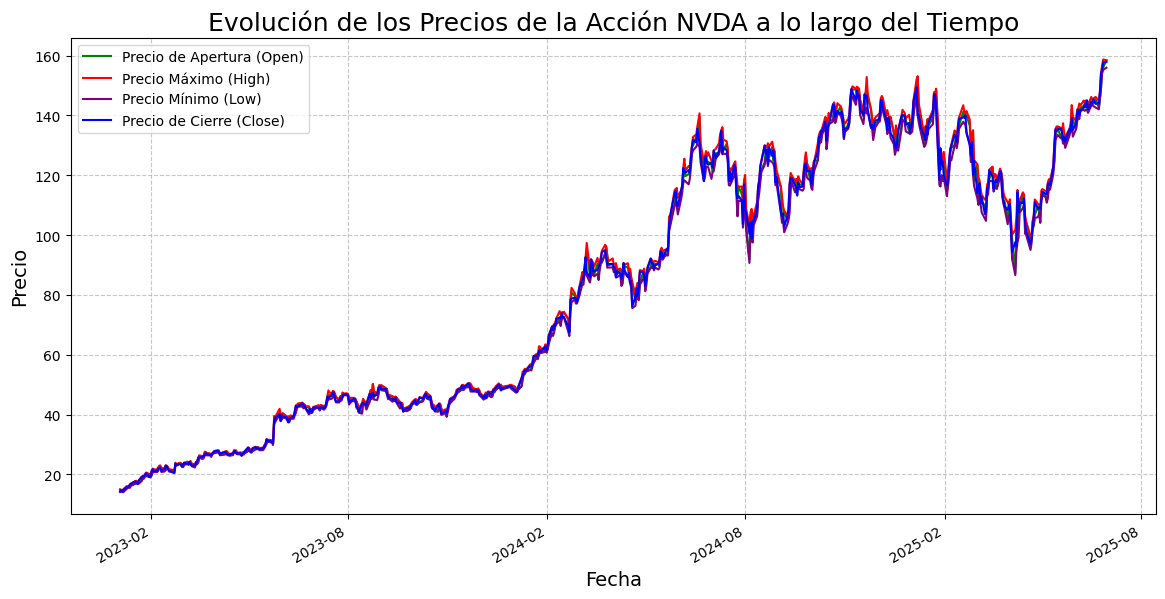

In [ ]:
# Grafico de datos importantes para NVDA

# Crear la figura y los ejes para el gráfico
plt.figure(figsize=(14, 7)) # Define el tamaño del gráfico (ancho, alto) en pulgadas

# Graficamos todas las columnas de interés
plt.plot(df_date_NVDA.index, df_date_NVDA['Open'], color='green', label='Precio de Apertura (Open)')
plt.plot(df_date_NVDA.index, df_date_NVDA['High'], color='red', label='Precio Máximo (High)')
plt.plot(df_date_NVDA.index, df_date_NVDA['Low'], color='purple', label='Precio Mínimo (Low)')
plt.plot(df_date_NVDA.index, df_date_NVDA['Close'], color='blue', label='Precio de Cierre (Close)')

plt.title('Evolución de los Precios de la Acción NVDA a lo largo del Tiempo', fontsize=18)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.legend(fontsize=10) # Mostrar leyenda para cada línea

# Mejorar el formato de las fechas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Solo Año-Mes
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6)) # Mostrar etiquetas cada 6 meses
plt.gcf().autofmt_xdate()

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

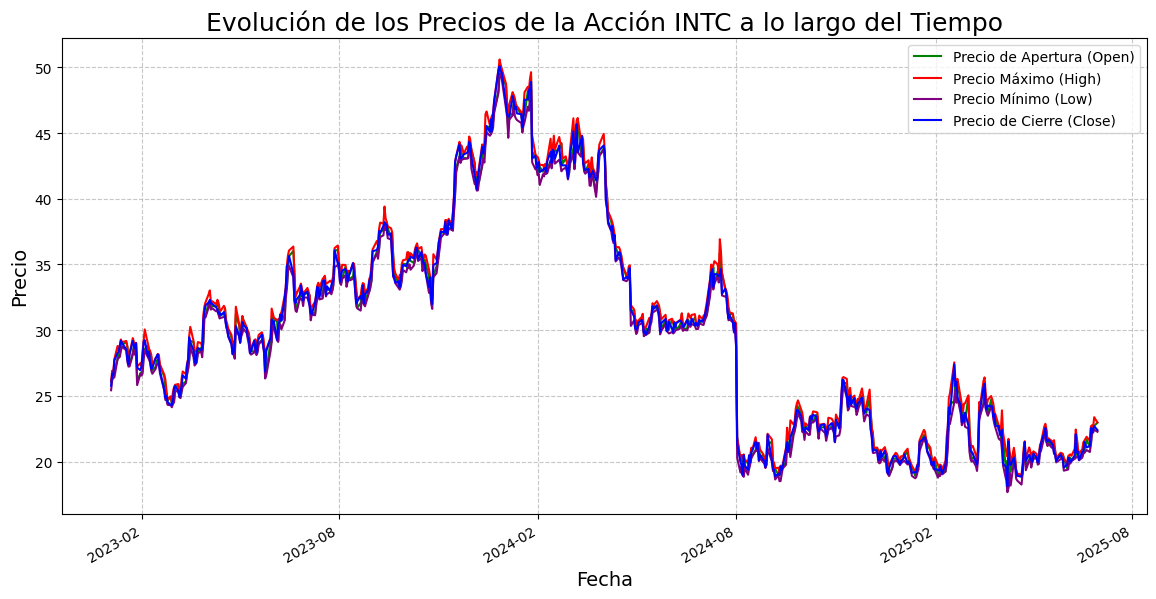

In [ ]:
# Grafico de datos importantes para INTC

# Crear la figura y los ejes para el gráfico
plt.figure(figsize=(14, 7)) # Define el tamaño del gráfico (ancho, alto) en pulgadas

# Graficamos todas las columnas de interés
plt.plot(df_date_INTC.index, df_date_INTC['Open'], color='green', label='Precio de Apertura (Open)')
plt.plot(df_date_INTC.index, df_date_INTC['High'], color='red', label='Precio Máximo (High)')
plt.plot(df_date_INTC.index, df_date_INTC['Low'], color='purple', label='Precio Mínimo (Low)')
plt.plot(df_date_INTC.index, df_date_INTC['Close'], color='blue', label='Precio de Cierre (Close)')

plt.title('Evolución de los Precios de la Acción INTC a lo largo del Tiempo', fontsize=18)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.legend(fontsize=10) # Mostrar leyenda para cada línea

# Mejorar el formato de las fechas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Solo Año-Mes
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6)) # Mostrar etiquetas cada 6 meses
plt.gcf().autofmt_xdate()

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# GRAFICOS IMPLEMENTANDO LA LIBRERIA SEABORN
Los siguentes 3 graficos muestran el comportamiento de rendimiento de los ultimos dos años.
El ultimo grafico indica el comportamiento del precio de cierre para las acciones.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_date_AMD = df_fl_AMD.set_index('Date')
df_date_NVDA = df_fl_NVDA.set_index('Date')
df_date_INTC = df_fl_INTC.set_index('Date')

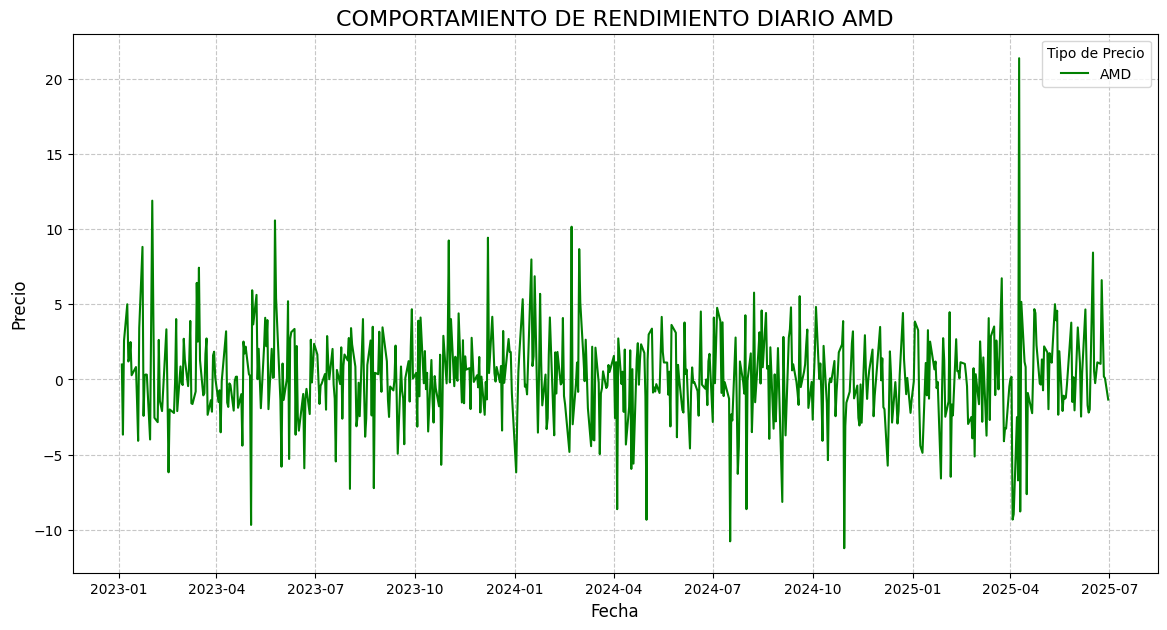

In [ ]:
#GRAFICOS DE ANALISIS DE RENDIMIENTO
plt.figure(figsize=(14, 7))
# np.log() es la función de logaritmo natural de NumPy
# Para evitar NaN al principio, podemos usar .shift(1) para obtener el precio anterior
df_date_AMD['Rendimiento_Diario_Log'] = np.log(df_date_AMD['Close'] / df_date_AMD['Close'].shift(1)) * 100
sns.lineplot(x=df_date_AMD.index, y=df_date_AMD['Rendimiento_Diario_Log'], label='AMD', color='green')

plt.title('COMPORTAMIENTO DE RENDIMIENTO DIARIO AMD', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.legend(title='Tipo de Precio') # Añadir título a la leyenda
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

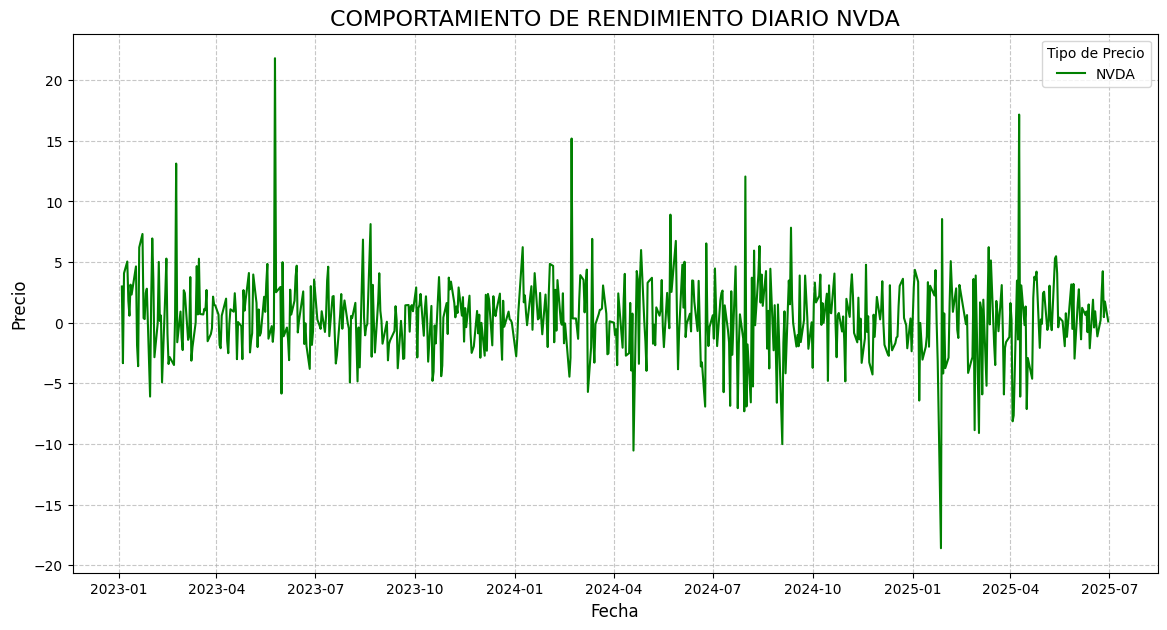

In [ ]:
#GRAFICOS DE ANALISIS DE RENDIMIENTO
plt.figure(figsize=(14, 7))
# np.log() es la función de logaritmo natural de NumPy
# Para evitar NaN al principio, podemos usar .shift(1) para obtener el precio anterior
df_date_NVDA['Rendimiento_Diario_Log'] = np.log(df_date_NVDA['Close'] / df_date_NVDA['Close'].shift(1)) * 100
sns.lineplot(x=df_date_NVDA.index, y=df_date_NVDA['Rendimiento_Diario_Log'], label='NVDA', color='green')

plt.title('COMPORTAMIENTO DE RENDIMIENTO DIARIO NVDA', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.legend(title='Tipo de Precio') # Añadir título a la leyenda
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

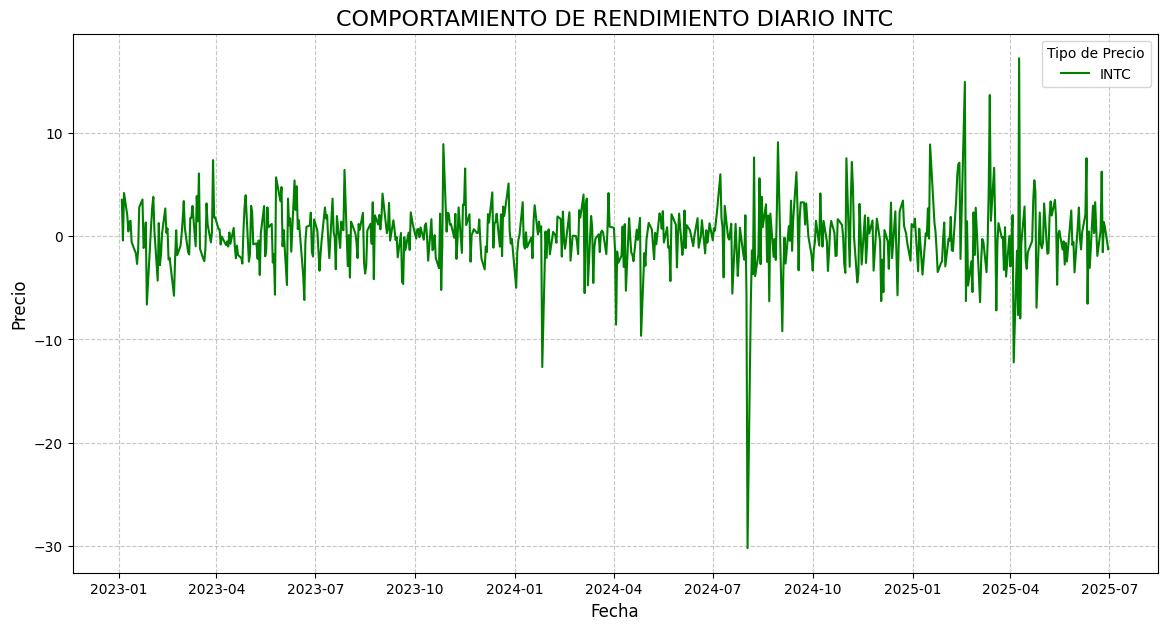

In [ ]:
#GRAFICOS DE ANALISIS DE RENDIMIENTO
plt.figure(figsize=(14, 7))
# np.log() es la función de logaritmo natural de NumPy
# Para evitar NaN al principio, podemos usar .shift(1) para obtener el precio anterior
df_date_INTC['Rendimiento_Diario_Log'] = np.log(df_date_INTC['Close'] / df_date_INTC['Close'].shift(1)) * 100
sns.lineplot(x=df_date_INTC.index, y=df_date_INTC['Rendimiento_Diario_Log'], label='INTC', color='green')

plt.title('COMPORTAMIENTO DE RENDIMIENTO DIARIO INTC', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.legend(title='Tipo de Precio') # Añadir título a la leyenda
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

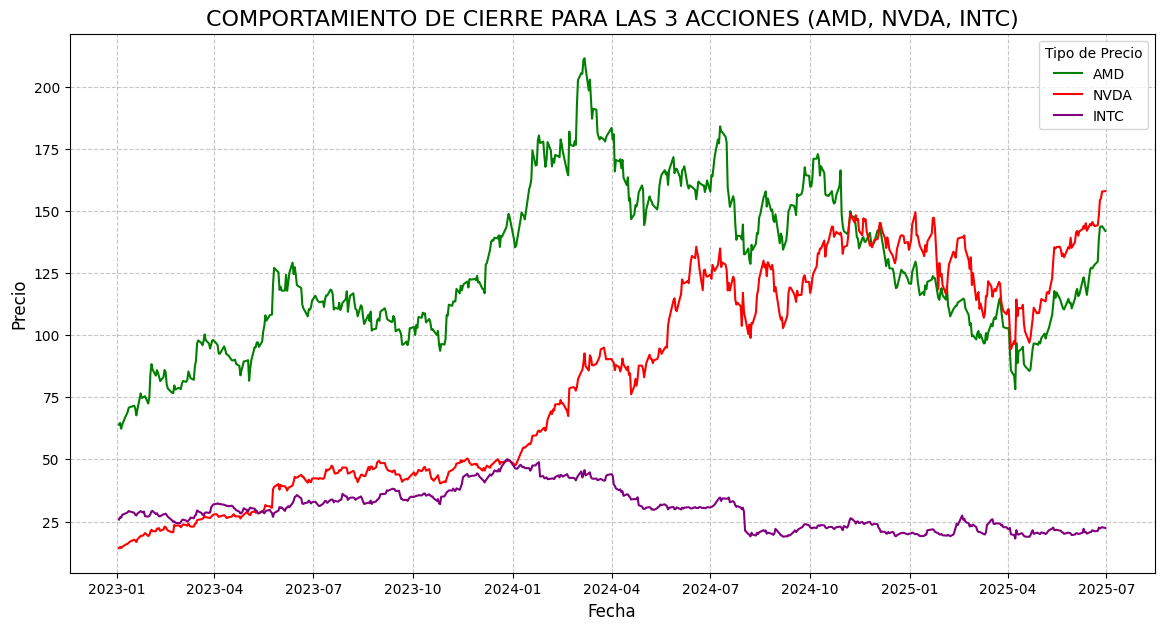

In [ ]:
#GRAFICOS DE ANALISIS PARA EL PRECIO DE CIERR
plt.figure(figsize=(14, 7))
sns.lineplot(x=df_date_AMD.index, y=df_date_AMD['Close'], label='AMD', color='green')
sns.lineplot(x=df_date_NVDA.index, y=df_date_NVDA['Close'], label='NVDA', color='red')
sns.lineplot(x=df_date_INTC.index, y=df_date_INTC['Close'], label='INTC', color='purple')

plt.title('COMPORTAMIENTO DE CIERRE PARA LAS 3 ACCIONES (AMD, NVDA, INTC)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.legend(title='Tipo de Precio') # Añadir título a la leyenda
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

SE ELIGE UN METODO FEATURE SELECTION PARA REDUCIR LA DIMENCION DEL DATASET

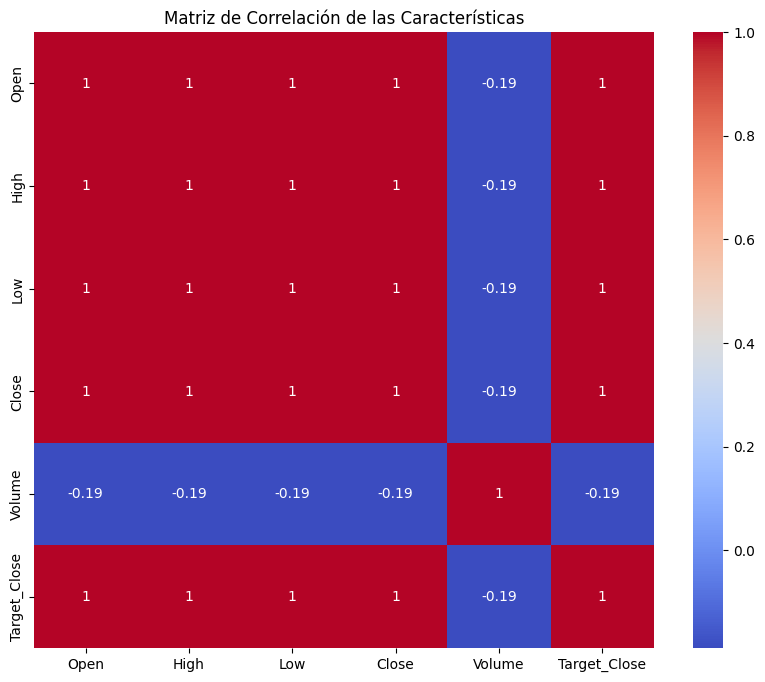

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_NVDA = pd.read_csv('NVDA_historical_data.csv')

df_NVDA['Target_Close'] = df_NVDA['Close'].shift(-1)
df_NVDA.dropna(inplace=True)

correlation_matrix = df_NVDA[['Open', 'High', 'Low', 'Close', 'Volume', 'Target_Close']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de las Características')
plt.show()

In [3]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Cargar el dataset (asegúrate de que el archivo 'NVDA_historical_data.csv' esté en el mismo directorio)
df = pd.read_csv('NVDA_historical_data.csv')

# Convertir la columna 'Date' a tipo datetime y establecerla como índice
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Crear la variable objetivo: el precio de cierre del día siguiente
# Usamos .shift(-1) para que cada fila tenga el precio de cierre del día siguiente
df['Target_Close'] = df['Close'].shift(-1)

# Eliminar la última fila, ya que su 'Target_Close' es NaN
df.dropna(inplace=True)

# Visualizar el DataFrame para confirmar que la preparación es correcta
print(df.head())

                               Open      High       Low     Close      Volume  \
Date                                                                            
1999-01-22 00:00:00-05:00  0.040116  0.044772  0.035579  0.037609  2714688000   
1999-01-25 00:00:00-05:00  0.040594  0.042026  0.037609  0.041549   510480000   
1999-01-26 00:00:00-05:00  0.042026  0.042862  0.037728  0.038325   343200000   
1999-01-27 00:00:00-05:00  0.038444  0.039400  0.036295  0.038206   244368000   
1999-01-28 00:00:00-05:00  0.038206  0.038444  0.037847  0.038086   227520000   

                           Dividends  Stock Splits  Target_Close  
Date                                                              
1999-01-22 00:00:00-05:00        0.0           0.0      0.041549  
1999-01-25 00:00:00-05:00        0.0           0.0      0.038325  
1999-01-26 00:00:00-05:00        0.0           0.0      0.038206  
1999-01-27 00:00:00-05:00        0.0           0.0      0.038086  
1999-01-28 00:00:00-05:00     

/tmp/ipython-input-1454782372.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


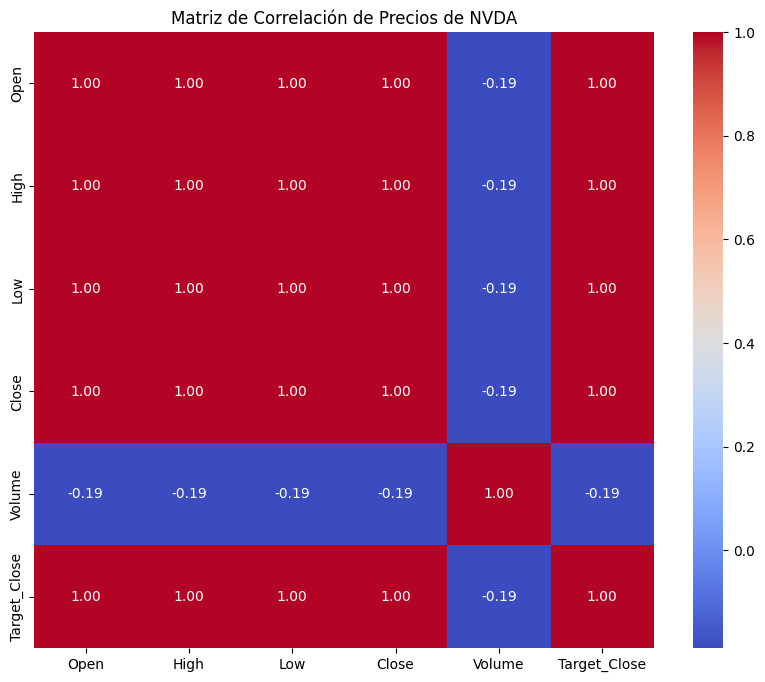

In [4]:
# Seleccionar las columnas numéricas relevantes para el análisis
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Target_Close']

# Calcular la matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Precios de NVDA')
plt.show()

# Interpretación de la matriz de correlación:
# - Observa la fila 'Target_Close'. Verás que 'Open', 'High', 'Low' y 'Close'
#   tienen una correlación extremadamente alta (cercana a 1). Esto es esperado.
# - La columna 'Volume' probablemente tendrá una correlación mucho menor con 'Target_Close'.
#   Si la correlación es muy baja (por ejemplo, < 0.1), podrías considerar eliminarla.
# - También observa la correlación entre las características de entrada.
#   Por ejemplo, 'Open' y 'High' probablemente tienen una alta correlación entre sí.
#   Mantener ambas no es un problema para Random Forest, pero es bueno ser consciente de ello.


Importancia de las Características con Random Forest:
  Feature  Importance
3   Close    0.524785
2     Low    0.338407
1    High    0.114356
0    Open    0.022235
4  Volume    0.000217


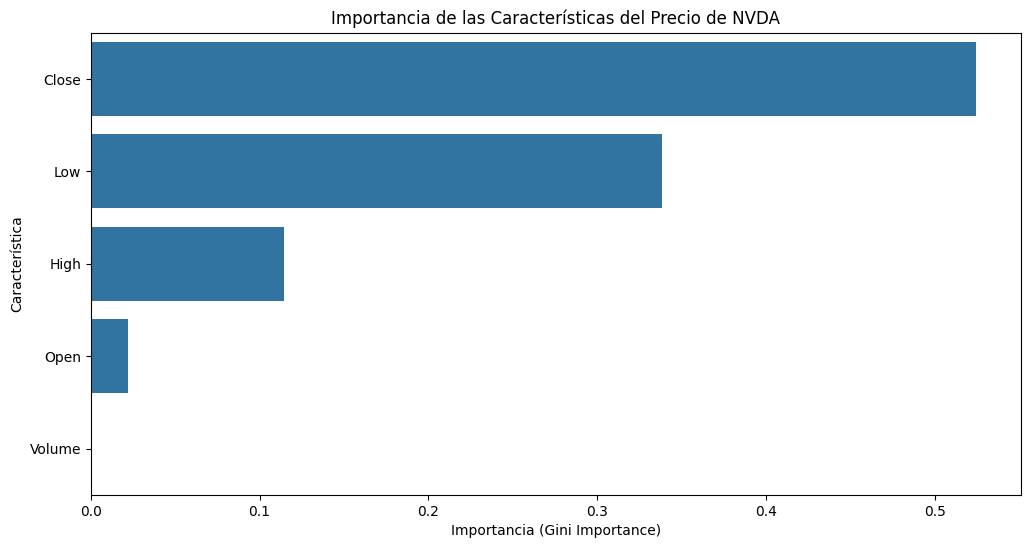

In [5]:
# Definir las características (X) y la variable objetivo (y)
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df[features]
y = df['Target_Close']

# Dividir los datos en conjuntos de entrenamiento y prueba
# Para series de tiempo, es mejor hacer una división manual basada en el tiempo
split_index = int(len(df) * 0.8) # Usar el 80% de los datos para entrenamiento
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Entrenar el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obtener la importancia de las características
importances = model.feature_importances_

# Crear un DataFrame para una mejor visualización de la importancia
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Imprimir el resultado
print("\nImportancia de las Características con Random Forest:")
print(feature_importance_df)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importancia de las Características del Precio de NVDA')
plt.xlabel('Importancia (Gini Importance)')
plt.ylabel('Característica')
plt.show()